In [1]:
###LIBRARIES
%matplotlib notebook
#%config InlineBackend.figure_format = 'retina'
import cv2
import numpy as np
from matplotlib import pyplot as plt
import shutil
from pathlib2 import Path
import pandas as pd
import sys
from enum import Enum
import os
import underwater_distortions as UWdistortion

### SNIPPETS

In [2]:
 ###SNIPPETS
#plot an image from opencv --- need to arrange order of channels, opencv loads BGR and plot dsiplays in RGB
def show_imgs(imgs):
    no_imgs = len(imgs)
    f, axarr = plt.subplots(1, no_imgs)
    for x in range(0,no_imgs):
        b,g,r = cv2.split(imgs[x])
        disp_img = cv2.merge((r,g,b))
        axarr[x].imshow(disp_img)
        axarr[x].set_xticks([]), axarr[x].set_yticks([]) # to hide tick values on X and Y axis
        
    plt.show()
    return

def show_one_img(img):
    b,g,r = cv2.split(img)
    disp_img = cv2.merge((r,g,b))
    plt.imshow(disp_img)
    plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
    plt.show()
    return

## DISORTION EXAMPLES

### Read original image

<IPython.core.display.Javascript object>


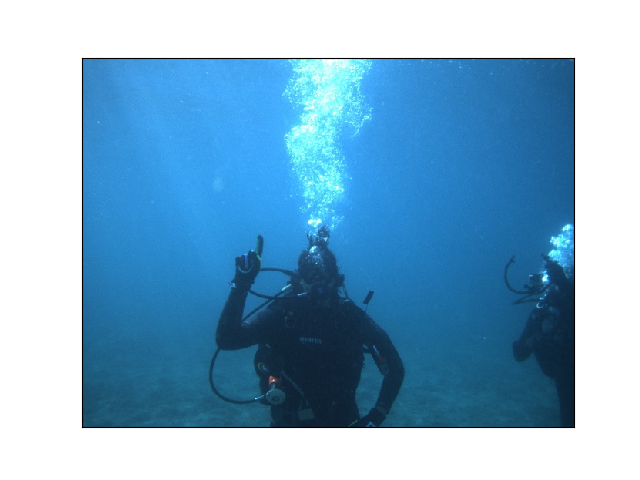

In [3]:
###Read sample files
#Need to define your own data folder -- using local repo data dir
data_path = '../data/samples/'
img_name = 'biograd-A_00041_right.jpg'
img_name2 = 'brodarski-A_00006_left.jpg'
sample_img_1 = cv2.imread((data_path+img_name), cv2.IMREAD_COLOR);
sample_img_2 = cv2.imread((data_path+img_name2), cv2.IMREAD_COLOR);
show_one_img(sample_img_1)

### Gaussian blur

#### Sigma (Standard deviation) = 1.5,3.0

<IPython.core.display.Javascript object>


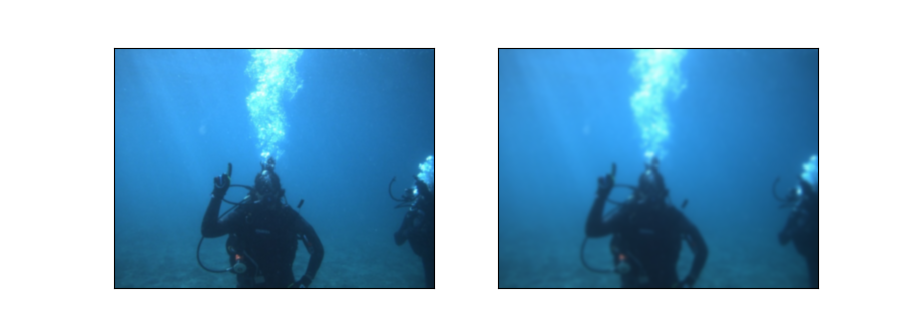

In [7]:
blur_std = [1.5,3]
result_imgs = [];
for std_dev in blur_std:
    blur_img = UWdistortion.gaussian_blur(sample_img_1,std_dev)
    result_imgs.append(blur_img)

show_imgs(result_imgs)

### Brightness shift

#### Brightness factor = 0.5,2.0

<IPython.core.display.Javascript object>


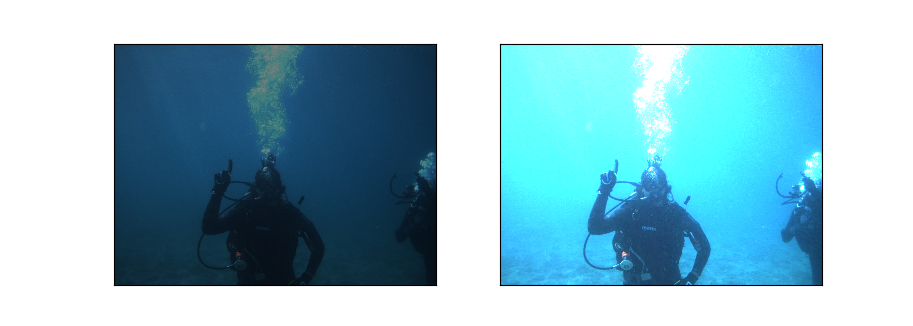

In [8]:
brightness_factor = [0.5,2.]
result_imgs = [];
for b in brightness_factor:
    sat_img = UWdistortion.brightness_shift(sample_img_1,b)
    result_imgs.append(sat_img)

show_imgs(result_imgs)
#minval,maxval,minloc,maxloc = cv2.minMaxLoc(sat_img[0,:,:])
#print(minval,maxval)

### Alpha blend - Simulate underwater haze

#### Alpha=0.5,0.25 Water Type = II

<IPython.core.display.Javascript object>


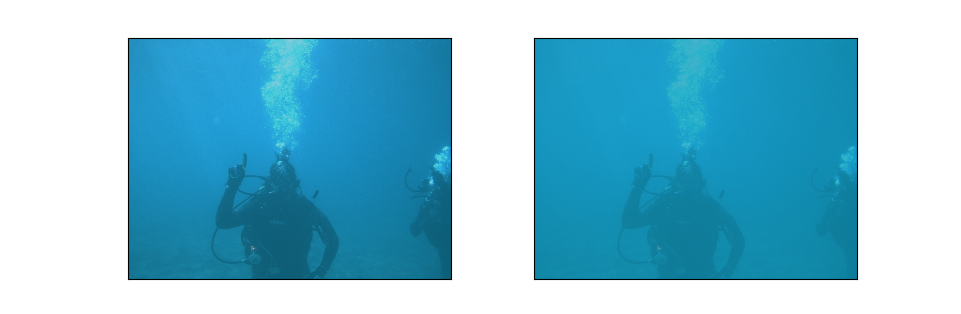

In [9]:
alphas = [0.5,0.25]
water_type = 'II'
result_imgs = [];
for alpha in alphas:
    blend_img = UWdistortion.alpha_blend(sample_img_1,alpha,water_type)
    result_imgs.append(blend_img)
show_imgs(result_imgs)

#### Alpha=0.5,0.25 Water Type = III

<IPython.core.display.Javascript object>


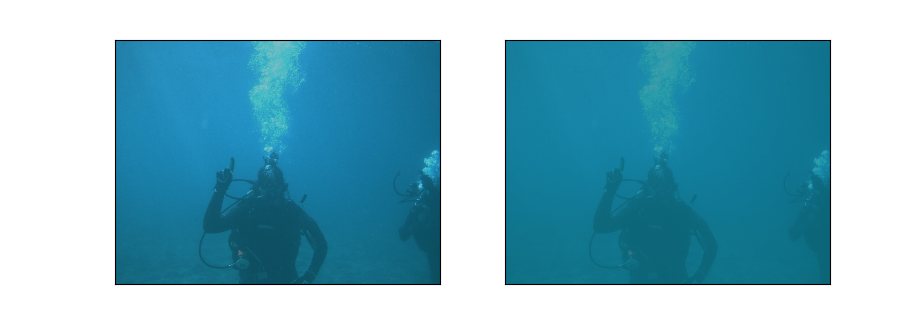

In [10]:
alphas = [0.5,0.25]
water_type = 'III'
result_imgs = [];
for alpha in alphas:
    blend_img = UWdistortion.alpha_blend(sample_img_1,alpha,water_type)
    result_imgs.append(blend_img)
show_imgs(result_imgs)

#### Alpha=0.5,0.25 Water Type = 1C

<IPython.core.display.Javascript object>


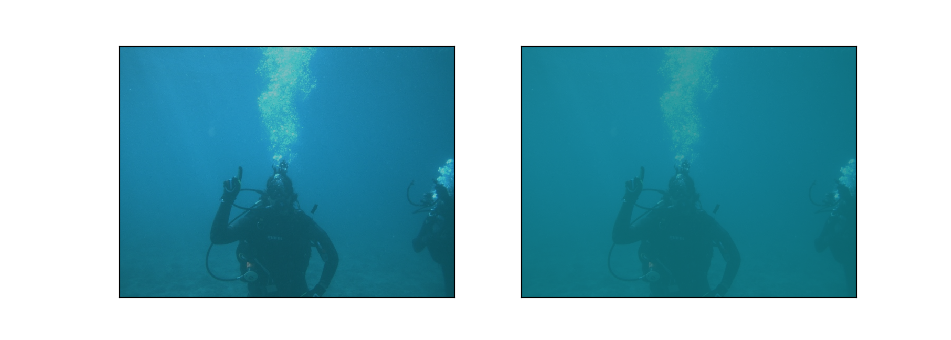

In [11]:
alphas = [0.5,0.25]
water_type = '1C'
result_imgs = [];
for alpha in alphas:
    blend_img = UWdistortion.alpha_blend(sample_img_1,alpha,water_type)
    result_imgs.append(blend_img)
show_imgs(result_imgs)

### White balance - underwater

#### Grayworld vs Simple WB

<IPython.core.display.Javascript object>


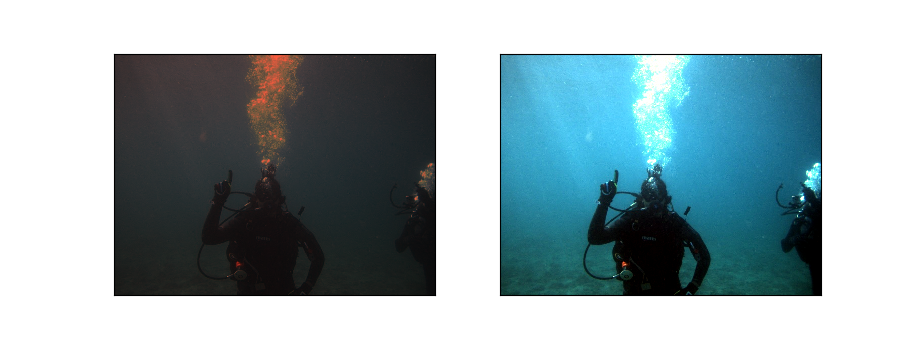

In [17]:
sat_thresh = 0.9
pix_thresh = 5.
result_imgs = [];
wb_gw_img = UWdistortion.white_balance(sample_img_1, UWdistortion.WhiteBalanceType.GRAYWORLD,
                                       sat_thresh=sat_thresh)
result_imgs.append(wb_gw_img)
wb_simple_img = UWdistortion.white_balance(sample_img_1,UWdistortion.WhiteBalanceType.SIMPLEWB,
                                           pix_thresh=pix_thresh)
result_imgs.append(wb_simple_img)

show_imgs(result_imgs)

### JPEG compression, Quality = 60,20

<IPython.core.display.Javascript object>


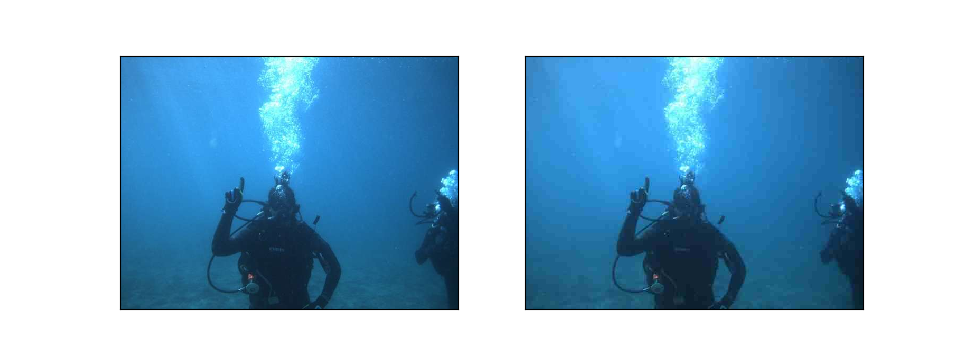

In [9]:
jpeg_quality = [60,20]
result_imgs = [];
for q in jpeg_quality:
    compress_img = UWdistortion.compress_img(sample_img_1,UWdistortion.CompressionType.JPEG,q)
    result_imgs.append(compress_img)

show_imgs(result_imgs)
